In [1]:
from sjspca import SJSPCA
import numpy as np
import matplotlib.pyplot as plt
from sjspca import isolation, shrinkage


 # 1 Data generation
 First we generate the testing data. The data is generated according to the paper.

In [2]:
H = np.random.multivariate_normal(np.zeros(2), np.diag([0.98, 1]), size=500)
S = np.array([[1, 1, 1, 1, 0, 0, 0, 0, -0.6, -0.6],
            [0, 0, 0, 0, 1, 1, 1, 1, 0.8, 0.8]])
Sh = S.T
e = np.random.multivariate_normal(np.zeros(10), np.diag([0.09, 0.09, 0.09, 0.09,
                                                        0.16, 0.16, 0.16, 0.16,
                                                        0.25, 0.25]), size=500)
X = H @ S + e


 # 2 Build a model with penalty from different space (principal / residual)
 ## 2.1 Principal space

iter: 0 Loss: 311.4619511276447
iter: 1 Loss: 286.0255056665176
iter: 2 Loss: 260.0851579994553
iter: 3 Loss: 233.48539956890465
iter: 4 Loss: 205.7884379053354
iter: 5 Loss: 175.56194327990346
iter: 6 Loss: 150.12699718512218
iter: 7 Loss: 128.73380913861746
iter: 8 Loss: 109.52632861623707
iter: 9 Loss: 92.06721808867675
iter: 10 Loss: 91.32334770654603
iter: 11 Loss: 91.27018696254301
iter: 12 Loss: 91.23381632199055
iter: 13 Loss: 91.19748630236438
iter: 14 Loss: 91.15609109904014
iter: 15 Loss: 91.10723828734324
iter: 16 Loss: 91.04892241424614
iter: 17 Loss: 90.97983621236281
iter: 18 Loss: 90.89812833249509
iter: 19 Loss: 90.80186334631384
iter: 20 Loss: 90.68954420175935
iter: 21 Loss: 90.55991076190844
iter: 22 Loss: 90.41169187147321
iter: 23 Loss: 90.24416396054283
iter: 24 Loss: 90.0576627018701
iter: 25 Loss: 89.85329267586818
iter: 26 Loss: 89.63319986275661
iter: 27 Loss: 89.4006184125912
iter: 28 Loss: 89.15956792114032
iter: 29 Loss: 88.91481784066534
iter: 30 Loss: 88

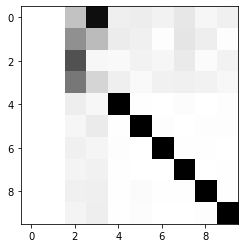

In [3]:
l1 = 220  # 220
l2 = 50
sigma = 0.002
n_neighbors = 10
sjspca = SJSPCA(n_components=2, l1=l1, l2=l2, partial_penalty=True, residual_penalty=False,
                knn_sigma=sigma, knn_n_neighbors=n_neighbors,
                verbose=True, apgd_max_iter=1000)
sjspca.fit(X)
print(sjspca.B_)
plt.imshow(np.fabs(sjspca.B_), cmap='gray_r')


 ## 2.2 Residual space

iter: 0 Loss: 1172.7153887597015
iter: 1 Loss: 1148.5690027798578
iter: 2 Loss: 1123.4289568348827
iter: 3 Loss: 1096.9219273991423
iter: 4 Loss: 1068.6179471748528
iter: 5 Loss: 1038.0674920373754
iter: 6 Loss: 1004.7162328420933
iter: 7 Loss: 969.6807960998353
iter: 8 Loss: 948.4039997282448
iter: 9 Loss: 939.7558032151364
iter: 10 Loss: 934.6151986673992
iter: 11 Loss: 930.5128899438865
iter: 12 Loss: 926.7606869996908
iter: 13 Loss: 923.1757477615383
iter: 14 Loss: 919.6982862873906
iter: 15 Loss: 916.3149143306775
iter: 16 Loss: 913.0620891869075
iter: 17 Loss: 910.0207479564585
iter: 18 Loss: 907.2824441207096
iter: 19 Loss: 904.9061818437035
iter: 20 Loss: 902.895823632535
iter: 21 Loss: 901.2052394376997
iter: 22 Loss: 899.7595973517114
iter: 23 Loss: 898.4764506267518
iter: 24 Loss: 897.2789111920322
iter: 25 Loss: 896.1021133155393
iter: 26 Loss: 894.8926731819745
iter: 27 Loss: 893.6045899938267
iter: 28 Loss: 892.1960205176078
iter: 29 Loss: 890.6218088317007
iter: 30 Loss:

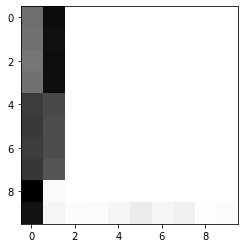

In [4]:
l1 = 220  # 220
l2 = 50
sigma = 0.002
n_neighbors = 10
sjspca = SJSPCA(n_components=2, l1=l1, l2=l2, partial_penalty=True, residual_penalty=True,
                knn_sigma=sigma, knn_n_neighbors=n_neighbors,
                verbose=True, apgd_max_iter=1000)
sjspca.fit(X)
print(sjspca.B_)
plt.imshow(np.fabs(sjspca.B_), cmap='gray_r')



# 3 Fault Isolation
## 3.1 Data generation

In [5]:
Bias = np.zeros([500, 10])
Bias[150:, [1, 3]] = [1.2, 1.8]
Xf = X + Bias

In [6]:
l1, Br, A = shrinkage(sjspca, X, l_init=1, step=2)
print('l1:', l1)
faulty_idx = isolation(l1, Br, A, l2, Xf=Xf, L=sjspca.L_, verbose=True)

norm(self.B - B_old): 0.0
l1: 256
Fault score:
[0.07530607 0.         0.05979014 0.20839079 0.         0.
 0.         0.         0.00064428 0.01102409]


<BarContainer object of 10 artists>

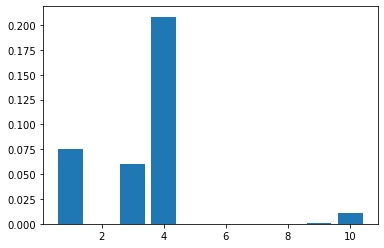

In [8]:
plt.bar([i+1 for i in range(10)],
        [0.07530607, 0, 0.05979014, 0.20839079, 0, 0, 0, 0, 0.00064428, 0.01102409])